# Classification - Logistic Regression

Accuracy : 0.4031

In [39]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [40]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = X_train.reshape(50000, -1)
X_test = X_test.reshape(10000, -1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 3072) (50000, 1) (10000, 3072) (10000, 1)


## Build and Train Model

In [41]:
logreg = LogisticRegression(solver='lbfgs')

In [42]:
logreg.fit(X_train, y_train)

c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number o

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluate

In [43]:
logreg.predict(X_test[0].reshape(1,-1))

array([3], dtype=uint8)

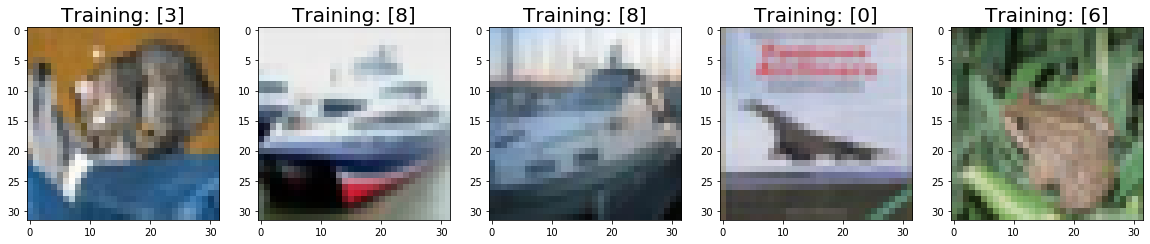

In [44]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_test[:5], y_test)):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (32,32,3)), cmap=plt.cm.gray)
    plt.title(f'Training: {label}', fontsize=20)

In [45]:
y_pred = logreg.predict(X_test)

In [46]:
score = accuracy_score(y_test, y_pred)
print('Accuracy :', score)

Accuracy : 0.4031


## Confusion Matrix

In [47]:
cm = confusion_matrix(y_test, predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

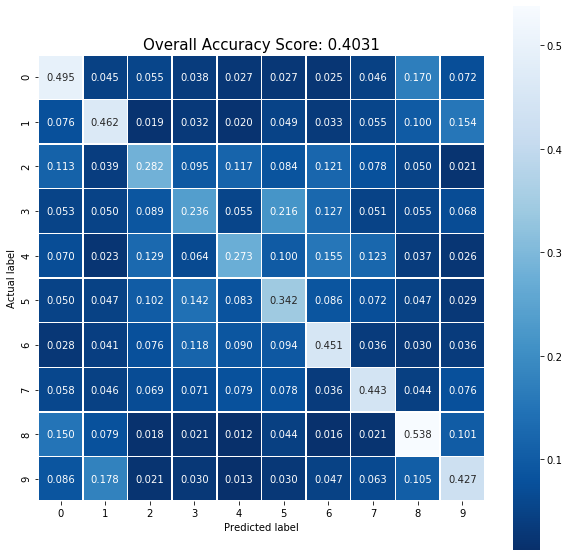

In [48]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('ConfusionMatrix_LogisticRegression.png')
plt.show();